In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime

In [2]:
OptInfo = {}
OptInfo['Bounds Longitude']     = [230,360]
OptInfo['Bounds Latitude']      = [-80,-40]
OptInfo['Grid Spacing (dx,dy)'] = [5,2.5]
OptInfo['Start Time']           = '2017-05-01'
OptInfo['End Time']             = '2017-06-01'
OptInfo['WayPoints']            = pd.read_csv('../../resources/WayPoints_TestExample3.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = False
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

In [3]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(OptInfo)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(0)

In [4]:
TT = TravelTime(cellGrid)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = WP1 ===
=== Processing Waypoint = WP2 ===


(-65.0, -50.0)

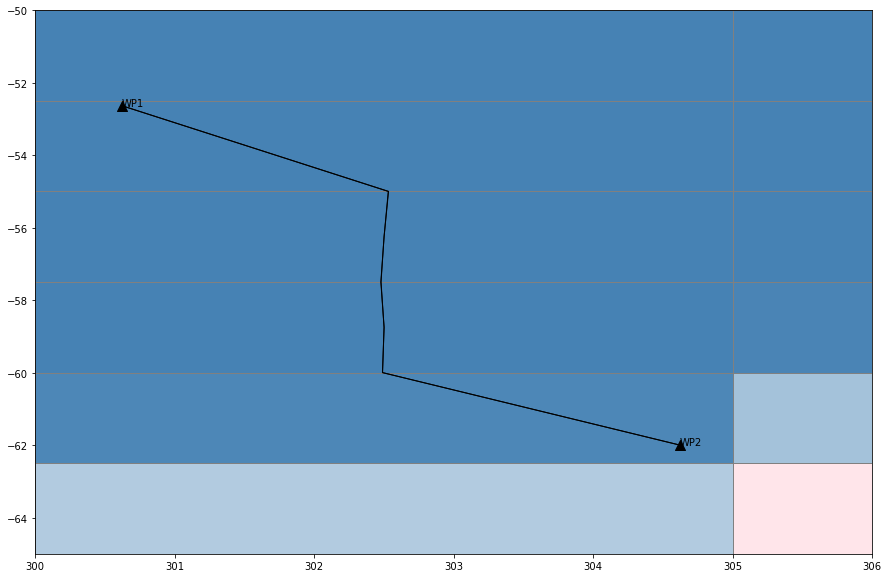

In [5]:
#Plotting the python paths
ax = TT.PlotPaths()
ax.set_xlim([300,306])
ax.set_ylim([-65,-50])

In [6]:
TT.PathSmoothing()

 PATH: WP1 -> WP2 
 PATH: WP2 -> WP1 


(-65.0, -50.0)

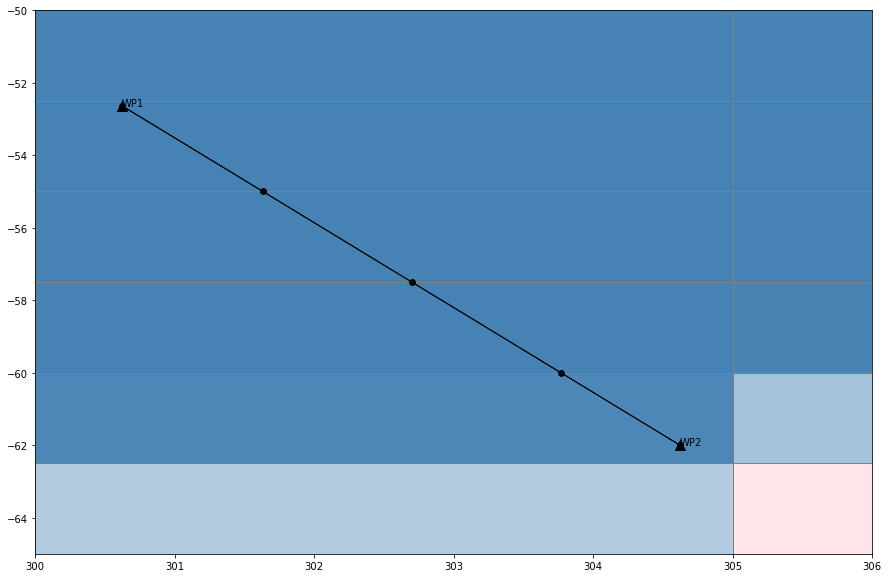

In [7]:
#Plotting the python paths
ax = TT.PlotPaths(routepoints=True)
ax.set_xlim([300,306])
ax.set_ylim([-65,-50])

In [19]:
TEST = np.array([[0,0],[1,1],[2,2]])
TEST.shape

(3, 2)

In [12]:
import numpy as np
np.insert?

Signature: np.insert(arr, obj, values, axis=None)
Docstring:
Insert values along the given axis before the given indices.

Parameters
----------
arr : array_like
    Input array.
obj : int, slice or sequence of ints
    Object that defines the index or indices before which `values` is
    inserted.

    .. versionadded:: 1.8.0

    Support for multiple insertions when `obj` is a single scalar or a
    sequence with one element (similar to calling insert multiple
    times).
values : array_like
    Values to insert into `arr`. If the type of `values` is different
    from that of `arr`, `values` is converted to the type of `arr`.
    `values` should be shaped so that ``arr[...,obj,...] = values``
    is legal.
axis : int, optional
    Axis along which to insert `values`.  If `axis` is None then `arr`
    is flattened first.

Returns
-------
out : ndarray
    A copy of `arr` with `values` inserted.  Note that `insert`
    does not occur in-place: a new array is returned. If
    `axis` is